**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_mldata, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

from scipy.spatial import distance

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm = 'brute', metric = 'euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    
    def fit(self, X, y):
        self.y = np.array(y)
        if self.algorithm == 'brute':
            self.X = np.array(X)
        elif self.algorithm == 'kd_tree':
            self.tree = KDTree(X, metric = self.metric)
    
    
    def find_kneighbors(self, X):
        n = self.n_neighbors
        D = distance.cdist(X, self.X, metric = self.metric)
        return D.argsort(axis = 1)[:,:n]
    
    
    def predict(self, X):
        if self.algorithm == 'brute':
            nearest_neighbors = self.find_kneighbors(X)
        elif self.algorithm == 'kd_tree':
            _, nearest_neighbors = self.tree.query(X , k = self.n_neighbors)
        i = 0
        predict = np.zeros(X.shape[0])
        for row in nearest_neighbors:
            predict[i] = np.argmax(np.bincount(self.y[row]))
            i += 1
        return predict.astype(int)


**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [10]:
%time clf.predict(X_test)

Wall time: 1.96 ms


array([1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2])

In [11]:
%time my_clf.predict(X_test)

Wall time: 996 µs


array([1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

Wall time: 6.98 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [16]:
%time clf.predict(X_test)

Wall time: 2.99 ms


array([1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2])

In [17]:
%time my_clf.predict(X_test)

Wall time: 996 µs


array([1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [21]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [22]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [23]:
count_vect = CountVectorizer(max_df = 0.04, min_df = 0.005)
X_train_counts = count_vect.fit_transform(data)

In [24]:
tfidfVect = TfidfVectorizer(max_df = 0.04, min_df = 0.005)
X_train_tfidf = tfidfVect.fit_transform(data)

In [25]:
X_train_counts = X_train_counts.toarray()

In [26]:
X_train_tfidf = X_train_tfidf.toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [25]:
cv = KFold(n_splits = 3, shuffle = True)

In [26]:
array_of_classifiers = []
for train_indices, test_indices in cv.split(X_train_counts, target):
    clf = MyKNeighborsClassifier(n_neighbors = 2, algorithm = 'brute')
    X_train, X_test = X_train_counts[train_indices], X_train_counts[test_indices]
    y_train, y_test = target[train_indices], target[test_indices]
    clf.fit(X_train, y_train)
    array_of_classifiers.append(clf)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [47]:
def optimal_number(X, y, k_list, algorithm = 'brute', metric = 'euclidean', return_accuracy = False):
        accuracy_array = np.zeros(len(k_list))
        i = 0
        for k in k_list:
            clf = MyKNeighborsClassifier(n_neighbors = k, algorithm = algorithm, metric = metric)
            accuracy_array[i] = cross_val_score(clf, X, y, cv = 3, scoring = 'accuracy').mean()
            i += 1
        if return_accuracy:
            return accuracy_array, np.argmax(accuracy_array) + 1
        else:
            return k_list[np.argmax(accuracy_array)]

In [28]:
k_list = np.arange(1, 11)

In [31]:
count_euclid_accuracy, count_euclid_neighbors = optimal_number(X_train_counts, target, k_list, 
                                                               metric = 'euclidean', return_accuracy = True)
print('Accuracy score:')
print(count_euclid_accuracy)
print('Optimal number of neighbors: ', count_euclid_neighbors)

Accuracy score:
[0.29679983 0.26772035 0.26294771 0.26886989 0.27258201 0.2698422
 0.26984211 0.26798621 0.26657212 0.26595331]
Optimal number of neighbors:  1


In [32]:
count_cosine_accuracy, count_cosine_neighbors = optimal_number(X_train_counts, target, k_list, 
                                                               metric = 'cosine', return_accuracy = True)
print('Accuracy score:')
print(count_cosine_accuracy)
print('Optimal number of neighbors: ', count_cosine_neighbors)

Accuracy score:
[0.43538925 0.41514916 0.43901302 0.46155178 0.47463311 0.48373646
 0.48983559 0.49425477 0.49876235 0.50839627]
Optimal number of neighbors:  10


In [35]:
tfidf_euclid_accuracy, tfidf_euclid_neighbors = optimal_number(X_train_tfidf, target, k_list,
                                                               metric = 'euclidean', return_accuracy = True)
print('Accuracy score:')
print(tfidf_euclid_accuracy)
print('Optimal number of neighbors: ', tfidf_euclid_neighbors)

Accuracy score:
[0.19294662 0.15458717 0.14097538 0.13434668 0.12895519 0.12851329
 0.12267974 0.11843712 0.11552024 0.11225041]
Optimal number of neighbors:  1


In [36]:
tfidf_cosine_accuracy, tfidf_cosine_neighbors = optimal_number(X_train_tfidf, target, k_list, 
                                                               metric = 'cosine', return_accuracy = True)
print('Accuracy score:')
print(tfidf_cosine_accuracy)
print('Optimal number of neighbors: ', tfidf_cosine_neighbors)

Accuracy score:
[0.44705652 0.431147   0.45368561 0.47569386 0.49160328 0.50229777
 0.51149055 0.51590933 0.52342215 0.52801838]
Optimal number of neighbors:  10


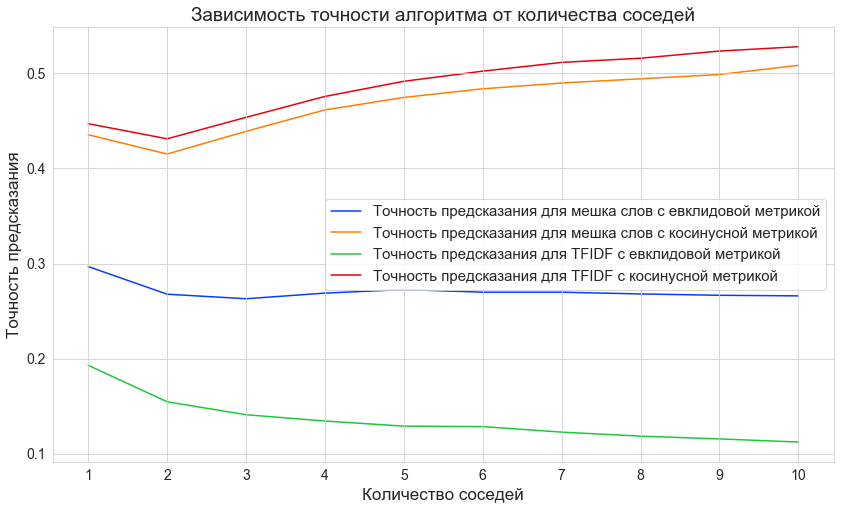

In [52]:
fig = plt.figure(figsize = (14, 8))
ax1 = fig.add_subplot(111)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title("Зависимость точности алгоритма от количества соседей", fontsize = 19)
plt.xlabel("Количество соседей", fontsize = 17) 
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylabel("Точность предсказания", fontsize = 17) 
sns.set_style("whitegrid", {'axes.axisbelow': False, 'axes.grid': True})
sns.set_palette('bright')
ax1.plot(k_list, count_euclid_accuracy, label = "Точность предсказания для мешка слов с евклидовой метрикой")
ax1.plot(k_list, count_cosine_accuracy, label = "Точность предсказания для мешка слов с косинусной метрикой")
ax1.plot(k_list, tfidf_euclid_accuracy, label = "Точность предсказания для TFIDF с евклидовой метрикой")
ax1.plot(k_list, tfidf_cosine_accuracy, label = "Точность предсказания для TFIDF с косинусной метрикой")
ax1.legend(fontsize = 15)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

### Промежуточные выводы

Можно заметить, что наибольшая точность модели достигается при 10 соседях, использовании косинусной метрики и TfIdf векторизации. К тому же, по графику видно, что точность продолжает расти с ростом числа соседей, из этого можно сделать предположение, что необходимо проверить большее число соседей. 

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [27]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [28]:
test_data = newsgroups['data']
test_target = newsgroups['target']

In [29]:
X_test_tfidf = tfidfVect.transform(test_data).toarray()

In [32]:
clf = MyKNeighborsClassifier(n_neighbors = 10, algorithm = 'brute', metric = 'cosine')
clf.fit(X_train_tfidf, target)
y_pred = clf.predict(X_test_tfidf)
accuracy_score(y_pred, test_target)

0.46229421136484333

In [70]:
cross_val_score(clf, X_train_tfidf, target, cv = 10, scoring='accuracy')

array([0.54770318, 0.52208481, 0.52738516, 0.52650177, 0.54907162,
       0.52608311, 0.56675508, 0.5596817 , 0.53846154, 0.52519894])

Запомним эти результаты, чтобы потом сравнить со скором на большем числе соседей. У нас возникало предположение, что для большего числа соседей качество улучшится. Проверим это.

In [34]:
k_list = np.arange(10, 250, 10)

In [37]:
tfidf_cosine_accuracy, tfidf_cosine_neighbors = optimal_number(X_train_tfidf, target, k_list, 
                                                               metric = 'cosine', return_accuracy = True)
print('Accuracy score:')
print(tfidf_cosine_accuracy)
print('Optimal number of neighbors: ', tfidf_cosine_neighbors)

Accuracy score:
[0.52801838 0.54772876 0.56134064 0.56938418 0.57539438 0.58078575
 0.58237651 0.58334882 0.58122763 0.58334871 0.58387886 0.58644221
 0.58432104 0.58449776 0.58573513 0.58644219 0.58387907 0.58440929
 0.5826416  0.58290676 0.58299508 0.58113895 0.5820227  0.58140416]
Optimal number of neighbors:  12


Здесь было 12 - это номер в массиве. Потом я немного поменяла функцию, поэтому, если вы перезапустите, ответом должно стать 120.

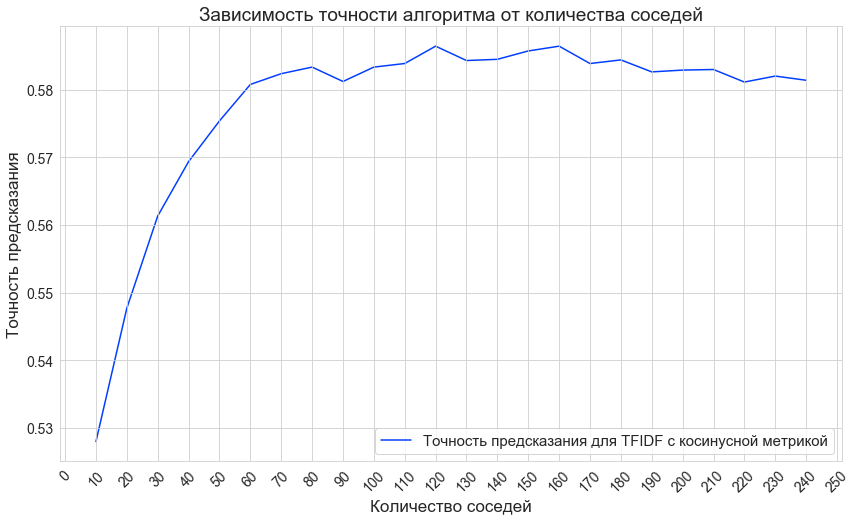

In [46]:
fig = plt.figure(figsize = (14, 8))
ax1 = fig.add_subplot(111)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)
plt.title("Зависимость точности алгоритма от количества соседей", fontsize = 19)
plt.xlabel("Количество соседей", fontsize = 17) 
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.ylabel("Точность предсказания", fontsize = 17) 
sns.set_style("whitegrid", {'axes.axisbelow': False, 'axes.grid': True})
sns.set_palette('bright')
ax1.plot(k_list, tfidf_cosine_accuracy, label = "Точность предсказания для TFIDF с косинусной метрикой")
ax1.legend(fontsize = 15)

Заметим, что, начиная с 90 соседей, точность перестает существенно увеличиваться. Но она действительно значительно выше, чем при 10 ближайших соседях.

На кросс-валидации получаем лучшее число соседей, равное 120. Выберем это значение параметра в нашей модели.

In [40]:
clf = MyKNeighborsClassifier(n_neighbors = 120, algorithm = 'brute', metric = 'cosine')
cross_val_score(clf, X_train_tfidf, target, cv = 10, scoring = 'accuracy')

array([0.59893993, 0.57332155, 0.57862191, 0.57862191, 0.60300619,
       0.57471264, 0.61361627, 0.61007958, 0.6127321 , 0.56498674])

Кросс-валидация не показывает переобученности, так что мы можем спокойно подставить этот параметр.

In [41]:
clf = MyKNeighborsClassifier(n_neighbors = 120, algorithm = 'brute', metric = 'cosine')
clf.fit(X_train_tfidf, target)
y_pred = clf.predict(X_test_tfidf)
accuracy_score(y_pred, test_target)

0.5491237387148168

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

# Выводы

Наилучшая точность была достигнута при использовании косинусной метрики и TfIdf векторизации. Косинусная метрика лучше евклидовой, т.к. она учитывает то, что тексты могут различаться по длине. Проведено небольшое исследование, которое показало, что до числа соседей, равного 100, наблюдается рост точности, которая затем остается примерно одинаковой. 

С помощью метода optimal_number(X, y, k_list, algorithm, metric, return_accuracy) можно получить оптимальное число ближайших соседей и точность по всем соседям. Возвращаемое значение зависит от установленного флага return_accuracy.

Точность лучшей модели на test части датасета составила 0.55. Это меньше, чем значение на кросс-валидации, т.к. при предсказании на тестовой выборке данные словаря могут существенно отличаться от тренировочной выборки. К тому же, на тестовой выборке всегда присутствует небольшая неизбежная переобученность.

Размер словаря пришлось ограничить, т.к. моему ноутбуку было грустно :( Были выбраны параметры max_df = 0.04; min_df = 0.005 и для CountVectorizer, и для TfidfVectorizer.